✅ Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



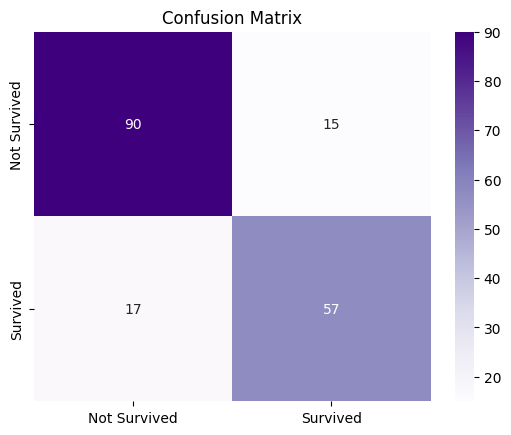

C:\Users\anasg\AppData\Local\Temp\ipykernel_21956\1687047287.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


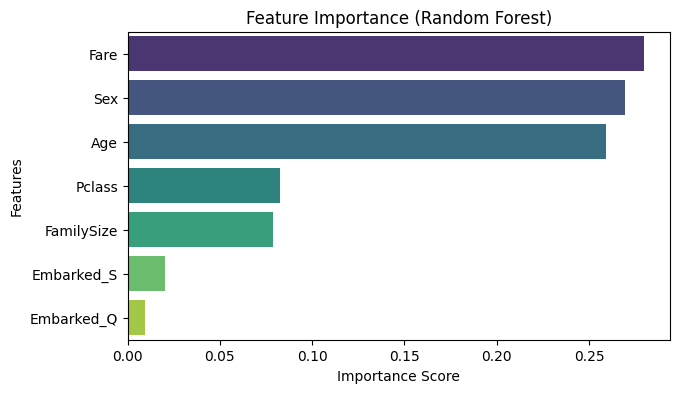

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset
df = pd.read_csv("C:\\Users\\anasg\\OneDrive\\Desktop\\abdul raheem\\DataScience\\task1\\Titanic-Dataset.csv")

# Convert Sex into numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Fare with median per Pclass (more realistic than global median)
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

# Fill missing Embarked with most frequent
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# One-hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Create a new feature: Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Select Features and Target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize'] + [col for col in df.columns if 'Embarked_' in col]
X = df[features]
y = df['Survived']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", 
            xticklabels=['Not Survived','Survived'], 
            yticklabels=['Not Survived','Survived'])
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")

plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()